# Filter Bad PairPrice

In [2]:
from modules.stores.StoreTimescaledb import StoreTimescaledb as Store
store = Store()
connection = store.connect()

https://www.dextools.io/app/bsc/pair-explorer/0x5EF4ED3D0fb714B1c1cF15cE372Ed9b805Fa5650


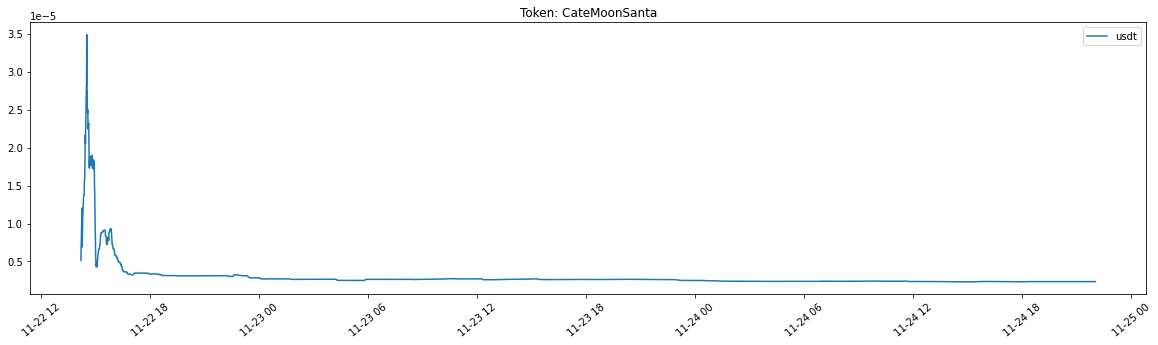

In [5]:
import matplotlib.pyplot as plt 
import numpy as np

fig, ax = plt.subplots()  # Create a figure containing a single axes.
fig.set_size_inches(20, 5)

activePairs = store.getActivePairs(idsOnly = True)
for activePair in activePairs[154:]:
    
    pairPriceList = store.getPairPrices(activePair)
    if len(pairPriceList) == 0:
        continue
    token = store.getTokenByAddress(pairPriceList[0].targetToken)
    
    x = [pairPrice.currentTime for pairPrice in pairPriceList ]
    y1 = [pairPrice.priceUsdt for pairPrice in pairPriceList ]
    y2 = [pairPrice.priceStableCoin for pairPrice in pairPriceList ]
    # ax.plot(x, y1, label='usdt')
    ax.plot(x, y2, label='stable')
    ax.set_title('Token: ' + token.name)
    ax.xaxis.set_tick_params(rotation=40)
    ax.legend()  # Add a legend.

    print("https://www.dextools.io/app/bsc/pair-explorer/" + activePair.address)
    break